# Computer Vision Project - Jason

# Loading Dataset and Importing Necessary Libraries

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

#Need matplotlib to visualize data, sklearn for the datasets for handwritten digits and model selection alongside training

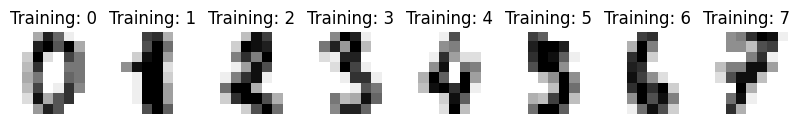

In [3]:
digits = datasets.load_digits()

# Visualizing sample, code from scikit-learn documentation https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html and https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
#Code here below on subplots determines how many numbers we can train on ncols
_, axes = plt.subplots(nrows=1, ncols=8, figsize=(10, 10))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    #displaying images
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    #set title
    ax.set_title("Training: %i" % label)
plt.show()

# Some visualizations on our  Dataset

In [4]:
#Must install skimage for transforming our images using pip install scikit-image
from skimage.transform import resize

Text(0.5, 1.0, 'Resized Image')

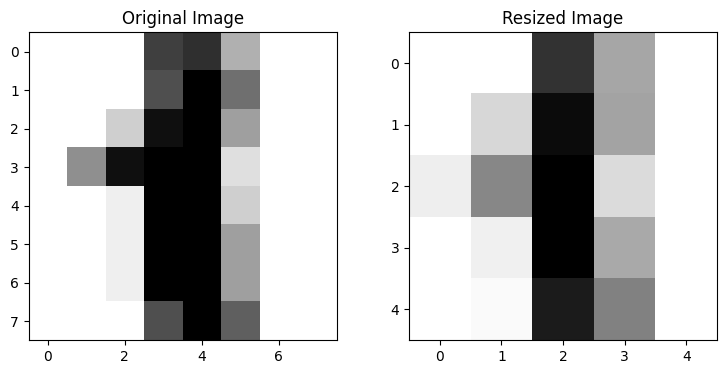

In [5]:
#digits = datasets.load_digits() was initialised earlier in our Data loading section so we can just use that. Using examples from https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
transformed_digit = digits.images[1]
Shape = (5, 5)
#use anti_aliasing to reduce artifacts and make image look smoother
resized_digit = resize(transformed_digit, Shape, anti_aliasing=True)

# Display the original and resized images
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

axes[0].imshow(transformed_digit, cmap=plt.cm.gray_r, interpolation="nearest")
axes[0].set_title("Original Image")

# Plot the resized image
axes[1].imshow(resized_digit, cmap=plt.cm.gray_r, interpolation="nearest")
axes[1].set_title("Resized Image")


# Classification of our image

In [6]:
# We have to flatten our images before we can do any training with them code mostly based off from: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
n_samples = len(digits.images)
#mainly need -1 to flatten our image 
data = digits.images.reshape((n_samples, -1))

#training the data 
#set shuffle to false to keep the same order 
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)


# Loading and selecting models 

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [8]:
#Support Vector Classifier - was imported at the start
svc_classifier = svm.SVC(gamma=0.001, kernel="linear")
#Random Forest Classifier 
rf_classifier = RandomForestClassifier()
#K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()



# Training data on each model and doing predictions

In [9]:
svc_classifier.fit(X_train, y_train)


SVC(gamma=0.001, kernel='linear')

In [10]:
rf_classifier.fit(X_train, y_train)


RandomForestClassifier()

In [11]:
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [12]:
svc_predict = svc_classifier.predict(X_test)
rf_predict = rf_classifier.predict(X_test)
knn_predict = knn_classifier.predict(X_test)

# Results for Support Vector Classification

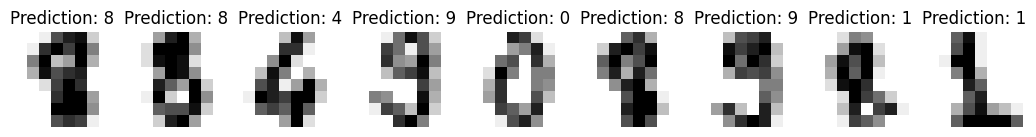

In [24]:
#Visualizing images using SVC
_, axes = plt.subplots(nrows=1, ncols=9, figsize=(13, 10))
for ax, image, prediction in zip(axes, X_test, svc_predict):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")
plt.show()

In [14]:
#Evualating model for SVC
print(f"Classification report for classifier {svc_classifier}:\n{metrics.classification_report(y_test, svc_predict)}\n")

Classification report for classifier SVC(gamma=0.001, kernel='linear'):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        88
           1       0.94      0.90      0.92        91
           2       1.00      0.99      0.99        86
           3       0.97      0.86      0.91        91
           4       0.99      0.95      0.97        92
           5       0.90      0.97      0.93        91
           6       0.98      0.99      0.98        91
           7       0.97      0.96      0.96        89
           8       0.88      0.92      0.90        88
           9       0.87      0.93      0.90        92

    accuracy                           0.94       899
   macro avg       0.95      0.94      0.94       899
weighted avg       0.95      0.94      0.94       899




Confusion matrix:
[[87  0  0  0  0  0  1  0  0  0]
 [ 0 82  0  0  0  0  0  0  3  6]
 [ 1  0 85  0  0  0  0  0  0  0]
 [ 0  0  0 78  0  4  0  1  8  0]
 [ 1  0  0  0 87  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  1  0  0  1  2  0 85  0  0]
 [ 0  3  0  1  0  1  0  1 81  1]
 [ 1  0  0  1  0  3  0  1  0 86]]


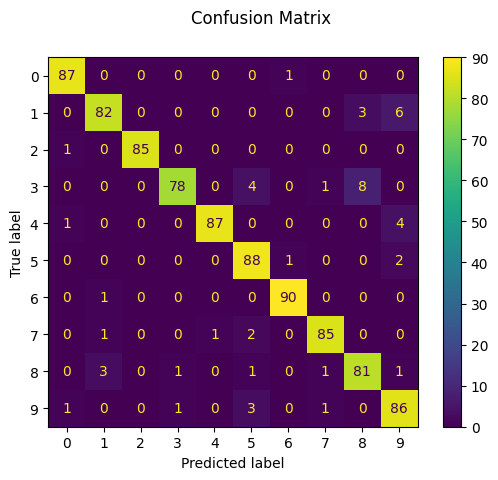

In [15]:
#Confusion Matrix for SVC
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, svc_predict)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# Results for Random Forest Classifier


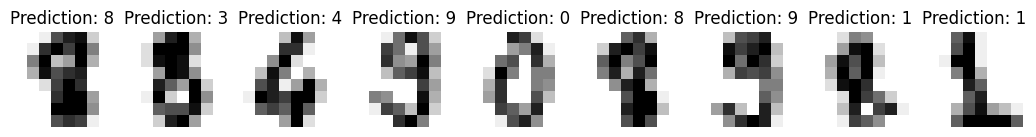

In [26]:
#Visualizing images using RFC
_, axes = plt.subplots(nrows=1, ncols=9, figsize=(13, 10))
for ax, image, prediction in zip(axes, X_test, rf_predict):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")
plt.show()

In [31]:
#Evualating model for RFC
print(f"Classification report for classifier {rf_classifier}:\n{metrics.classification_report(y_test, rf_predict)}\n")

Classification report for classifier RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        88
           1       0.95      0.88      0.91        91
           2       0.99      0.91      0.95        86
           3       0.87      0.86      0.86        91
           4       0.99      0.92      0.96        92
           5       0.87      0.91      0.89        91
           6       0.98      1.00      0.99        91
           7       0.94      1.00      0.97        89
           8       0.92      0.88      0.90        88
           9       0.84      0.93      0.89        92

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899




Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 80  0  3  0  1  0  0  0  7]
 [ 1  0 78  6  0  0  0  0  0  1]
 [ 1  1  0 78  0  3  0  3  5  0]
 [ 2  0  0  0 85  2  0  1  0  2]
 [ 0  0  0  0  0 83  2  0  0  6]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 89  0  0]
 [ 0  3  1  1  0  4  0  2 77  0]
 [ 0  0  0  2  0  2  0  0  2 86]]


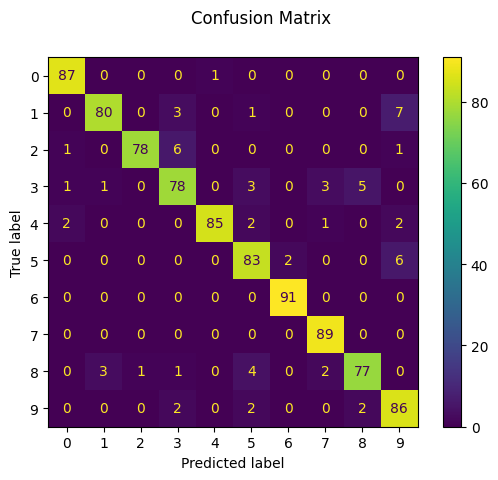

In [18]:
#Confusion Matrix for RFC
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, rf_predict)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# Results for K-Nearest Neighbors


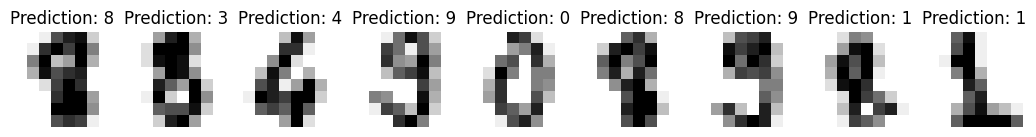

In [25]:
#Visualizing images using KNN
_, axes = plt.subplots(nrows=1, ncols=9, figsize=(13, 10))
for ax, image, prediction in zip(axes, X_test, knn_predict):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")
plt.show()

In [20]:
#Evualating model for KNN
print(f"Classification report for classifier {knn_classifier}:\n{metrics.classification_report(y_test, knn_predict)}\n")

Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       0.95      0.98      0.96        91
           2       0.98      0.93      0.95        86
           3       0.89      0.90      0.90        91
           4       1.00      0.95      0.97        92
           5       0.96      0.98      0.97        91
           6       0.99      1.00      0.99        91
           7       0.95      1.00      0.97        89
           8       0.95      0.90      0.92        88
           9       0.91      0.92      0.92        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899




Confusion matrix:
[[88  0  0  0  0  0  0  0  0  0]
 [ 0 89  0  0  0  0  0  0  1  1]
 [ 1  0 80  5  0  0  0  0  0  0]
 [ 0  0  1 82  0  2  0  3  2  1]
 [ 0  0  0  0 87  0  0  1  0  4]
 [ 0  0  0  0  0 89  1  0  0  1]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 89  0  0]
 [ 0  5  1  1  0  0  0  1 79  1]
 [ 0  0  0  4  0  2  0  0  1 85]]


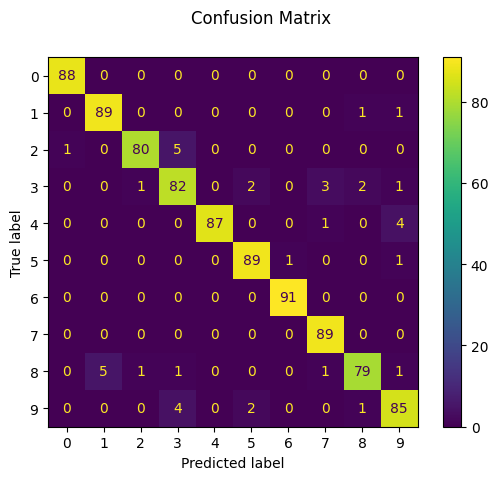

In [21]:
#Confusion Matrix for KNN
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, knn_predict)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# Comparison and Discussion of results

KNeighborClassifier has good overall performance(96% Accuracy and Macro Avg F1-Score) and class wise it does very good across all of them since it has high precision, recall and f-1 score. Especially class 0, 4, 6 and 7 (Classes as in the numbers) which has consistent performance.

Linear SVC is slightly lower compared to KNeighborClassifier (94% Accuracy and Macro Avg F1-Score). Class-wise it has good overall balance in between precision and recall and has the highest precision for classes 2 and 4 but lower recoil for classes 3, 5 and 8.

Finally, compared to Linear SVC we have RandomForestClassifier with an overall accuracy and macro avg f-1 score of 93% which is just slightly lower than it. It has generally good precision and recall, but slightly lower recall for classes 1, 3 and 8. It performs really well for classes 0, 2, 4, 6 and 9.







# Conclusion
KNeighborsClassifier is overall a strong model even when taking their precision and recall into account and it seems to have the highest Accuracy out of all the other models here. However, Linear SVC may still be considerable because the classes here are linearly separable meaning it's still effective added on top of the fact Linear Models require less memory compared to KNeighborsClassifier and is faster to train with. It will still struggle with very complex data however.

In conclusion, KNeighborsClassifier seems to be the best model as it has the highest Accuracy out of all the other models but Linear SVC is still an option.

# X_New 

In [33]:
import numpy as np

In [37]:
X_new = np.empty((n_samples, 16))


for i in range(n_samples):
    for j in range(0, data.shape[1], 4):
        X_new[i, j // 4] = np.mean(data[i, j:j+4])
print(X_new)
print(X_new.shape)

[[4.5  2.5  7.   ... 5.5  4.75 2.5 ]
 [3.   4.5  2.75 ... 5.5  2.75 6.5 ]
 [1.   6.75 4.75 ... 8.   0.75 9.  ]
 ...
 [3.   4.   7.25 ... 7.75 2.75 4.75]
 [3.   1.75 7.5  ... 6.25 4.25 7.  ]
 [6.   2.25 8.   ... 8.   5.25 6.75]]
(1797, 16)


# X_New training data

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_new, digits.target, test_size=0.5, shuffle=False)

# X_New Models

In [40]:
svc_classifier.fit(X_train, y_train)


SVC(gamma=0.001, kernel='linear')

In [41]:
rf_classifier.fit(X_train, y_train)


RandomForestClassifier()

In [42]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

# X_new predictions

In [43]:
svc_predict = svc_classifier.predict(X_test)
rf_predict = rf_classifier.predict(X_test)
knn_predict = knn_classifier.predict(X_test)

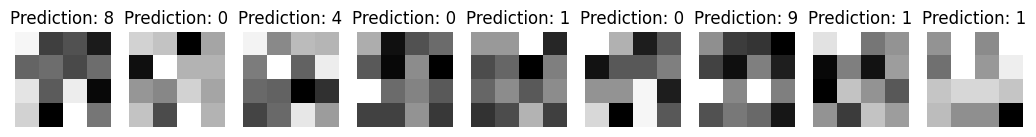

Classification report for classifier SVC(gamma=0.001, kernel='linear'):
              precision    recall  f1-score   support

           0       0.68      0.76      0.72        88
           1       0.63      0.78      0.70        91
           2       0.89      0.98      0.93        86
           3       0.85      0.76      0.80        91
           4       0.97      0.90      0.93        92
           5       0.83      0.91      0.87        91
           6       0.96      0.99      0.97        91
           7       0.95      0.99      0.97        89
           8       0.67      0.41      0.51        88
           9       0.91      0.86      0.88        92

    accuracy                           0.83       899
   macro avg       0.83      0.83      0.83       899
weighted avg       0.83      0.83      0.83       899


Confusion matrix:
[[67 10  4  0  1  0  0  0  6  0]
 [ 8 71  0  2  1  0  1  0  6  2]
 [ 0  1 84  1  0  0  0  0  0  0]
 [ 0  2  6 69  0  6  0  2  6  0]
 [ 0  1  0  0 83  

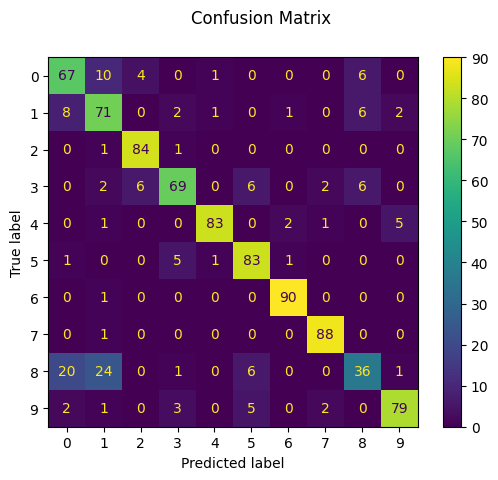

In [48]:
#SVC Predictions with x_new
_, axes = plt.subplots(nrows=1, ncols=9, figsize=(13, 10))
for ax, features, prediction in zip(axes, X_test, svc_predict):
    ax.set_axis_off()
    

    image = features.reshape(4, 4)
    
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

plt.show()

print(f"Classification report for classifier {svc_classifier}:\n{metrics.classification_report(y_test, svc_predict)}\n")
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, svc_predict)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")


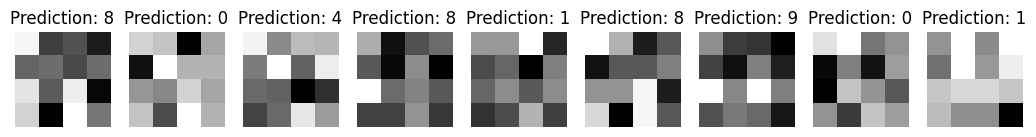

Classification report for classifier RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        88
           1       0.78      0.66      0.71        91
           2       0.90      0.86      0.88        86
           3       0.75      0.82      0.79        91
           4       0.95      0.85      0.90        92
           5       0.90      0.99      0.94        91
           6       0.97      0.98      0.97        91
           7       0.92      0.98      0.95        89
           8       0.73      0.68      0.71        88
           9       0.90      0.89      0.90        92

    accuracy                           0.86       899
   macro avg       0.86      0.86      0.86       899
weighted avg       0.86      0.86      0.86       899


Confusion matrix:
[[77  4  2  0  0  1  0  0  4  0]
 [ 4 60  1  9  0  1  0  0 14  2]
 [ 0  0 74 12  0  0  0  0  0  0]
 [ 2  1  5 75  0  3  0  4  1  0]
 [ 0  2  0  0 78  0  2  3  

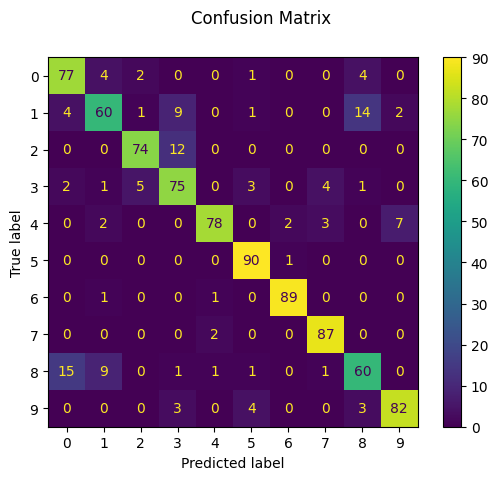

In [52]:
#RF Predictions with x_new
_, axes = plt.subplots(nrows=1, ncols=9, figsize=(13, 10))
for ax, features, prediction in zip(axes, X_test, rf_predict):
    ax.set_axis_off()
    

    image = features.reshape(4, 4)
    
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

plt.show()

print(f"Classification report for classifier {rf_classifier}:\n{metrics.classification_report(y_test, rf_predict)}\n")
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, rf_predict)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")


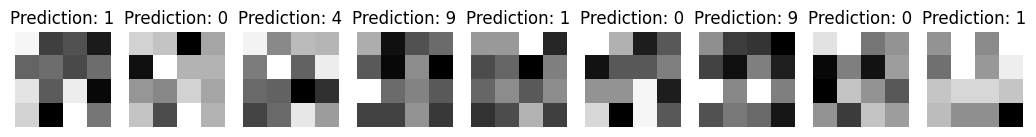

Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.59      0.98      0.74        88
           1       0.83      0.71      0.77        91
           2       0.97      0.90      0.93        86
           3       0.84      0.89      0.86        91
           4       0.96      0.92      0.94        92
           5       0.95      0.95      0.95        91
           6       0.95      0.99      0.97        91
           7       0.96      0.97      0.96        89
           8       0.91      0.48      0.63        88
           9       0.97      0.93      0.95        92

    accuracy                           0.87       899
   macro avg       0.89      0.87      0.87       899
weighted avg       0.89      0.87      0.87       899


Confusion matrix:
[[86  1  1  0  0  0  0  0  0  0]
 [23 65  0  0  0  0  0  0  3  0]
 [ 0  0 77  9  0  0  0  0  0  0]
 [ 3  1  1 81  0  2  0  2  1  0]
 [ 0  2  0  0 85  0  2  0  0 

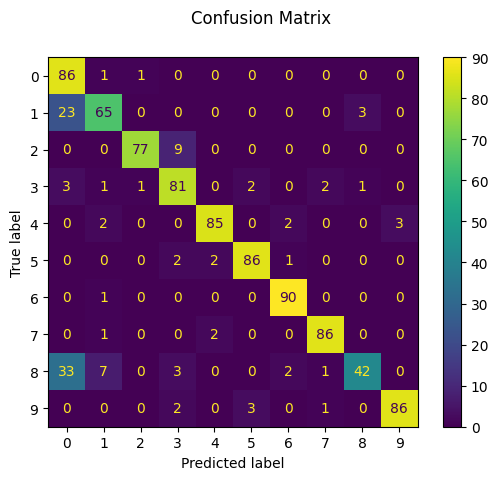

In [51]:
#KNN Predictions with x_new
_, axes = plt.subplots(nrows=1, ncols=9, figsize=(13, 10))
for ax, features, prediction in zip(axes, X_test, knn_predict):
    ax.set_axis_off()
    

    image = features.reshape(4, 4)
    
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

plt.show()

print(f"Classification report for classifier {knn_classifier}:\n{metrics.classification_report(y_test, knn_predict)}\n")
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, knn_predict)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")


# Comparing x_new to prevous results

You can see that the precision, recall and f-1 score are dramatically much smaller and can barely predict the outcome after downsampling our original dataset by so much. This affects their performance as important information to make predictions is lost as pixels in an image are crucial for our models here. Tasks like digit recognition often benefit from considering all pixels to capture the intricate patterns that distinguish between different digits.

However even under these conditions we can see that KNN and RF is doing generally well overall in their performance for different classes but Our SVC Linear Kernel is not doing really well as the complexitiy might be too much for the model to perform well.

# References

Shi, A. and Shi, K. (2021) SVM with Scikit-Learn: What You Should Know, Medium. Available at: https://towardsdatascience.com/svm-with-scikit-learn-what-you-should-know-780f1bc99e4a (Accessed: 03 December 2023). 

Support Vector Regression (SVR) using linear and non-linear kernels (no date) Scikit-learn. Available at: https://scikit-learn.org/stable/modules/svm.html (Accessed: 28 November 2023).

sklearn.ensemble.RandomForestClassifier (no date)  Scikit-learn. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html# (Accessed: 28 November 2023).

3.3. Metrics and scoring: quantifying the quality of predictions (no date) Scikit-learn. Available at: https://scikit-learn.org/stable/modules/model_evaluation.html (Accessed: 28 November 2023).

Recognizing hand-written digits (no date) Scikit-learn. https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html (Accessed: 28 November 2023).